# Exploratory Data Analysis of Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_rows",None)

In [2]:
train = pd.read_csv("C:\\Users\\Hardik Sachdeva\\Documents\\Python\\Titanic dataset\\train.csv")
test = pd.read_csv("C:\\Users\\Hardik Sachdeva\\Documents\\Python\\Titanic dataset\\test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# find no. of missing values in each column
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Dealing with Missing Values

heatmap can tell about the missing values in each column

<AxesSubplot:>

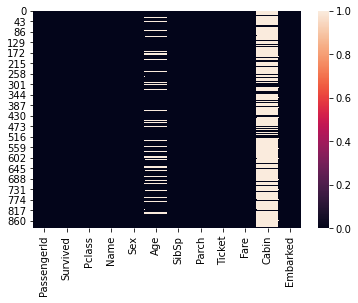

In [8]:
sns.heatmap(train.isna())

<AxesSubplot:>

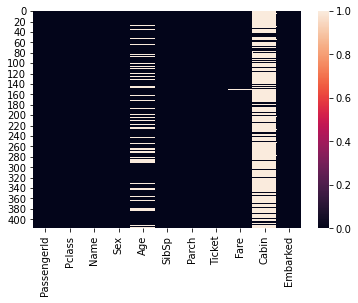

In [9]:
sns.heatmap(test.isna())

Both train and test dataframe have some missing values in Age column and a very few in Fare column which can be handled but the Cabin column is mostly empty so it can be dropped since it cannot give out relations to other features.

### Dealing with Missing values in Age 

An relation b/w Age and Pclass can be used to handle missing values. Boxplot provides with average age of people in each Passenger Class which signifies that people of a certain age group prefer a particular passenger class. 
Thus, we can replace the missing age values with the average age of people in that particular Passenger Class 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

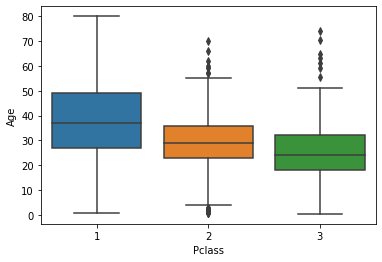

In [10]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [11]:
train.Age[train['Pclass']==1].mean()

38.233440860215055

In [12]:
train.Age[train['Pclass']==2].mean()

29.87763005780347

In [13]:
train.Age[train['Pclass']==3].mean()

25.14061971830986

In [14]:
# Filling missing values with average age of passengers in each Passenger class
train['Age']=np.where((train.Pclass==1),train['Age'].fillna(round(train.Age[train['Pclass']==1].mean())),train.Age)
train['Age']=np.where((train.Pclass==2),train['Age'].fillna(round(train.Age[train['Pclass']==2].mean())),train.Age)
train['Age']=np.where((train.Pclass==3),train['Age'].fillna(round(train.Age[train['Pclass']==3].mean())),train.Age)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

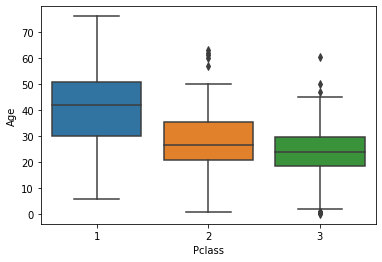

In [15]:
sns.boxplot(x='Pclass',y='Age',data=test)

In [16]:
test.Age[test['Pclass']==1].mean()

40.91836734693877

In [17]:
test.Age[test['Pclass']==2].mean()

28.7775

In [18]:
test.Age[test['Pclass']==3].mean()

24.02794520547945

In [19]:
test['Age']=np.where((test.Pclass==1),test['Age'].fillna(round(test.Age[test['Pclass']==1].mean())),test.Age)
test['Age']=np.where((test.Pclass==2),test['Age'].fillna(round(test.Age[test['Pclass']==2].mean())),test.Age)
test['Age']=np.where((test.Pclass==3),test['Age'].fillna(round(test.Age[test['Pclass']==3].mean())),test.Age)

### Missing values in Fare

In [20]:
test[test['Fare']==test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,41.0,0,0,112051,0.0,NaN,S
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S


Both missing values from fare are from those in Pclass 1, so the missing fare values can be replaced by an average of fare paid by people in Pclass 1

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

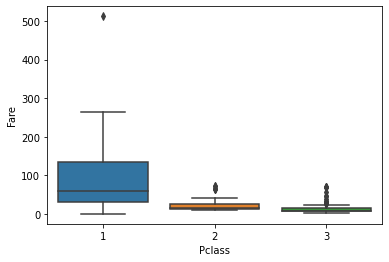

In [21]:
sns.boxplot(x='Pclass',y='Fare',data=test)

In [22]:
test.Fare[test['Pclass']==1].mean()

94.28029719626169

In [23]:
# Filling missing fare values by average fare paid by passengers of passenger class 1
test.Fare.fillna(round(test.Fare[test['Pclass']==1].mean()),inplace=True)

Cabin column is mostly empty so it can be dropped

In [24]:
del train['Cabin']
del test['Cabin']

In [25]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [26]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
train[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [28]:
train[train['Ticket'].str.startswith('1135')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,NaN
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,38.0,0,1,113505,55.0000,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,S
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,38.0,0,0,113510,35.0000,S
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C
782,783,0,1,"Long, Mr. Milton Clyde",male,29.0,0,0,113501,30.0000,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,NaN


Since most of the Passengers with a similar ticket number boarded from Southampton, replacing the missing embarked values with S

In [29]:
train['Embarked'].fillna('S',inplace=True)

In [30]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data Vizualisations to find relations and interpret data

Creating a new column which contains Yes an No values of whether a person was travelin with family or not.

In [31]:
# Adding new column with null values to be filled later
train['With_Family']=np.NaN

In [32]:
# filling null values with Yes if the person has any Sibling,Spouse,Parent,Child traveling with him/her else filling No
train['With_Family']=np.where((train.SibSp!=0)|(train.Parch!=0),train['With_Family'].fillna('Yes'),train['With_Family'].fillna('No'))

### Survival and Gender

Plots below depict that of those survived, most were female (68%) and only 32% male. Among female, 74% survived while among male, 19% survived

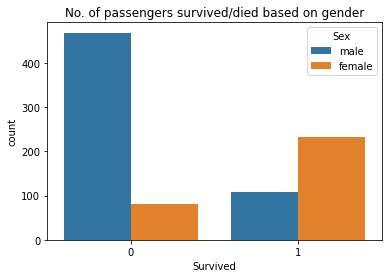

In [33]:
# Shows number of people survived/died based on gender
sns.countplot(x='Survived',hue='Sex',data=train).set_title("No. of passengers survived/died based on gender")
plt.show()

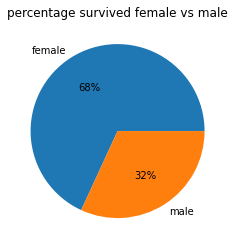

In [34]:
# percentage survived femals vs male
plt.pie(train.Sex[train.Survived==1].value_counts(),labels=['female','male'], autopct='%1.0f%%')
plt.title("percentage survived female vs male")
plt.show()

In [35]:
labels=['Died','Survived']

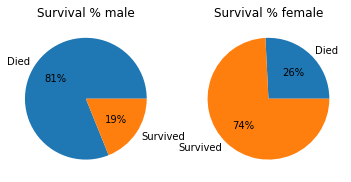

In [36]:
plt.subplot(1,2,1)
plt.pie(train.Survived[train.Sex=='male'].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Survival % male")
plt.subplot(1,2,2)
plt.pie(train.Survived[train.Sex=='female'].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Survival % female")
plt.show()

## Age and Survival 

When we compare each age group with its Survival, it shows that a child(<16) was more likely to survive that the other two age groups. Among their own age groups, 59% Children survived while only 37% adults(<60) and 27% Seniors(>=60) surived among their age groups

In [37]:
# Making a column with null values to fill later to categorize Age into Age groups 
train['Age Group']=np.NaN

In [38]:
# Age < 16 are Child, 16<=Age<60 are adults and Age>=60 are Seniors
train['Age Group']=np.where(train.Age<16,train['Age Group'].fillna('Child'),train['Age Group'])
train['Age Group']=np.where((train.Age>=16)&(train.Age<60),train['Age Group'].fillna('Adult'),train['Age Group'])
train['Age Group']=np.where(train.Age>=60,train['Age Group'].fillna('Senior'),train['Age Group'])

<AxesSubplot:xlabel='Age Group', ylabel='count'>

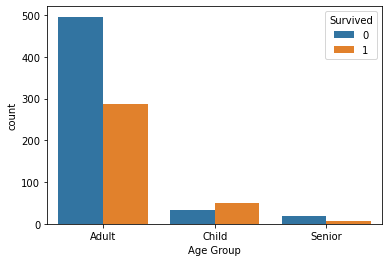

In [39]:
sns.countplot(x='Age Group',hue='Survived',data=train)

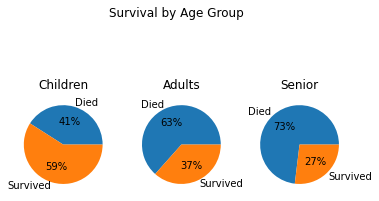

In [40]:
plt.suptitle("Survival by Age Group")
plt.subplot(1,3,1)
plt.pie(train.Survived[train['Age Group']=='Child'].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Children")
plt.subplot(1,3,2)
plt.pie(train.Survived[train['Age Group']=='Adult'].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Adults")
plt.subplot(1,3,3)
plt.pie(train.Survived[train['Age Group']=='Senior'].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Senior")
plt.show()

### Survival and Passenger Class 

Depicts that among those from Passenger class 1, more survived than died unlike the other two cases, where there were more deaths than survival. This was because Passenger Class 1 was closer to the lifeboats which increased their chances of survival. Despite the total passengers in Passenger class 3 being much more than that of passenger class 1, the number of survivors were less. 

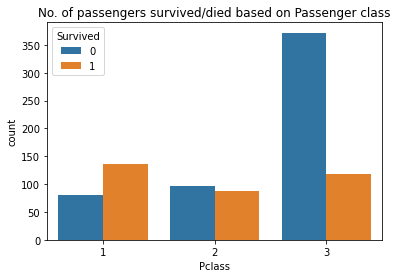

In [41]:
sns.countplot(x='Pclass',hue='Survived',data=train).set_title("No. of passengers survived/died based on Passenger class")
plt.show()

#### Relation b/w Passenger Class and Survival over each individual groups (men, women, children)

To test the relationship b/w Passenger class and Survival for each individual group to check if Passenger class really has a strong effect on Survival or not

In [42]:
# Making 3 different datasets from train dataset for each category : men, women, children
train_men = train[(train.Sex=='male')&(train.Age>=16)]
train_women = train[(train.Sex=='female')&(train.Age>=16)]
train_children = train[train.Age<16]

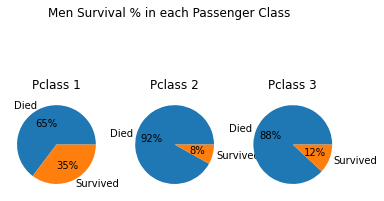

In [43]:
plt.suptitle("Men Survival % in each Passenger Class")
plt.subplot(1,3,1)
plt.pie(train_men.Survived[train_men.Pclass==1].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Pclass 1")
plt.subplot(1,3,2)
plt.pie(train_men.Survived[train_men.Pclass==2].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Pclass 2")
plt.subplot(1,3,3)
plt.pie(train_men.Survived[train_men.Pclass==3].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Pclass 3")
plt.show()

Among men, 35% survived in Pclass 1, 8% from Pclass 2 and 12% from Pclass 3 which is strange because it was suspected that those in higher passenger classes would survive at higher rate but the rate of survival among men in second class is less than that of third class.

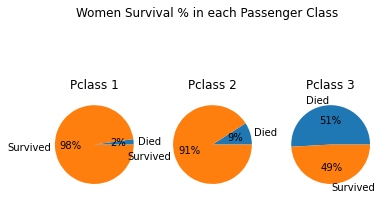

In [44]:
plt.suptitle("Women Survival % in each Passenger Class")
plt.subplot(1,3,1)
plt.pie(train_women.Survived[train_women.Pclass==1].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Pclass 1")
plt.subplot(1,3,2)
plt.pie(train_women.Survived[train_women.Pclass==2].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Pclass 2")
plt.subplot(1,3,3)
plt.pie(train_women.Survived[train_women.Pclass==3].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Pclass 3")
plt.show()

Among women, 98% in first class survived, 91% in second class and 49% in third class. Surviving at higher rates than men, and matches the hypothesis that lower the Passenger Class, Lower the rate of survival

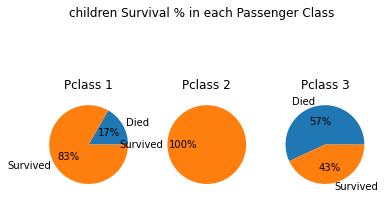

In [45]:
plt.suptitle("children Survival % in each Passenger Class")
plt.subplot(1,3,1)
plt.pie(train_children.Survived[train_children.Pclass==1].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Pclass 1")
plt.subplot(1,3,2)
plt.pie(train_children.Survived[train_children.Pclass==2].value_counts(sort=False),labels=['Survived'],colors=['tab:orange'], autopct='%1.0f%%')
plt.title("Pclass 2")
plt.subplot(1,3,3)
plt.pie(train_children.Survived[train_children.Pclass==3].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Pclass 3")
plt.show()

83% of children in first class survived, whereas 100% of children in second class survived (which is more than that of first class), and 43% of children in third class survived

The relationship between passenger class and survival (hypothesis that lower the Passenger class lower the chances of survival) does not hold perfectly when passenger categories are involved which determines gender and age groups played more of a factor than passenger class when determining who survived

### Embarkation Point and Survival 

55% of those embarked from Cherbourg survived, while only around 34% and 39% who embarked from Southampton and Queenstown respectively Survived which tells someone who boarded from Cherbourg is more likely to survive

<AxesSubplot:xlabel='Embarked', ylabel='count'>

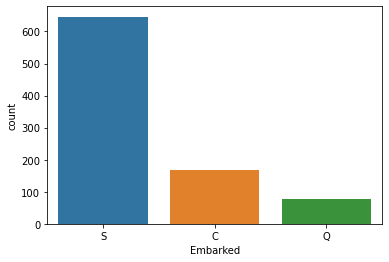

In [46]:
sns.countplot(x='Embarked',data=train)  #Most people embarked from Southampton, then Cherbourg and then Queenstown 

<AxesSubplot:xlabel='Embarked', ylabel='count'>

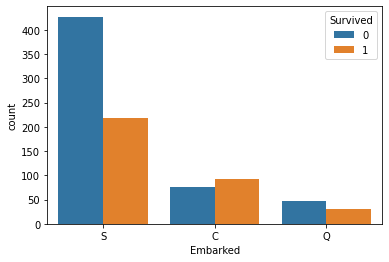

In [47]:
sns.countplot(x='Embarked',hue='Survived',data=train)

In [48]:
# Percentage Survived who embarked from Southampton
len(train[(train.Embarked=='S')&(train.Survived==1)])/len(train[(train.Embarked=='S')]) * 100

33.90092879256966

In [49]:
# Percentage survived who embarked from Cherbourg
len(train[(train.Embarked=='C')&(train.Survived==1)])/len(train[(train.Embarked=='C')]) * 100

55.35714285714286

In [50]:
# Percentage survived who embarked from Queenstown
len(train[(train.Embarked=='Q')&(train.Survived==1)])/len(train[(train.Embarked=='Q')]) * 100

38.961038961038966

### Embarkation point and survival when passenger categories are involved 

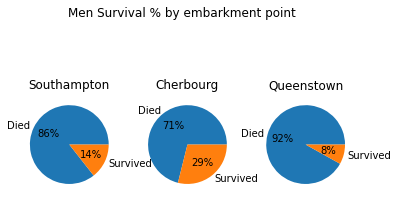

In [51]:
plt.suptitle("Men Survival % by embarkment point")
plt.subplot(1,3,1)
plt.pie(train_men.Survived[train_men.Embarked=='S'].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Southampton")
plt.subplot(1,3,2)
plt.pie(train_men.Survived[train_men.Embarked=='C'].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Cherbourg")
plt.subplot(1,3,3)
plt.pie(train_men.Survived[train_men.Embarked=='Q'].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Queenstown")
plt.show()

It shows that men were most likely to survive if they boarded at Cherbourg (29% survival rate) versus the two other embarkment points, Southmapton (14%) and Queenstown (8%)

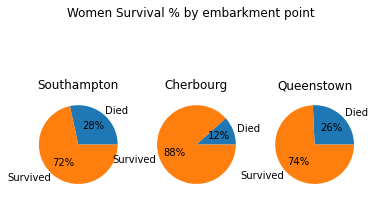

In [52]:
plt.suptitle("Women Survival % by embarkment point")
plt.subplot(1,3,1)
plt.pie(train_women.Survived[train_women.Embarked=='S'].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Southampton")
plt.subplot(1,3,2)
plt.pie(train_women.Survived[train_women.Embarked=='C'].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Cherbourg")
plt.subplot(1,3,3)
plt.pie(train_women.Survived[train_women.Embarked=='Q'].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Queenstown")
plt.show()

Again, among women also, likelihood of survival was most for those who embarked from Cherbourg (88% survived) as compared to other those who embarked from other two sites, Southampton(72%) and Queenstown(74%)

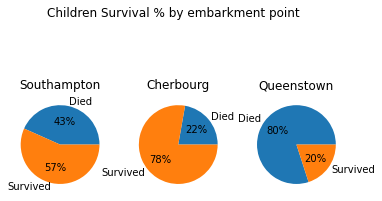

In [53]:
plt.suptitle("Children Survival % by embarkment point")
plt.subplot(1,3,1)
plt.pie(train_children.Survived[train_children.Embarked=='S'].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Southampton")
plt.subplot(1,3,2)
plt.pie(train_children.Survived[train_children.Embarked=='C'].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Cherbourg")
plt.subplot(1,3,3)
plt.pie(train_children.Survived[train_children.Embarked=='Q'].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Queenstown")
plt.show()

All the plots above indicate that even after involving passenger categories in the relation between embarkent site and survival, the hypothesis that people who boarded from Cherbourg more likely survived as compared to those who boarded from other two sites holds

## Traveling with family and Survival

This Shows that those traveling with families survive at higher rates(51% among those with family survived) as compared to those traveling individually (30% survived).

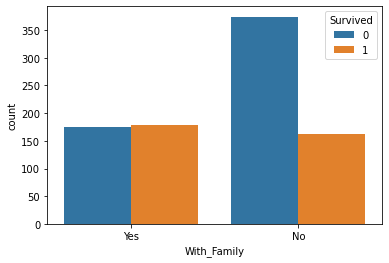

In [54]:
sns.countplot(x='With_Family',hue='Survived',data=train)
plt.show()

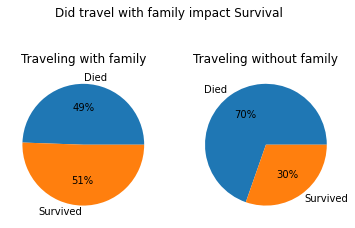

In [55]:
plt.suptitle("Did travel with family impact Survival")
plt.subplot(1,2,1)
plt.pie(train.Survived[train['With_Family']=='Yes'].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Traveling with family")
plt.subplot(1,2,2)
plt.pie(train.Survived[train['With_Family']=='No'].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Traveling without family")
plt.show()

Among those who survived, 52% were traveling with family and 48% were traveling individually

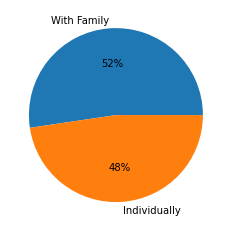

In [56]:
plt.pie(train.With_Family[train.Survived==1].value_counts(),labels=['With Family','Individually'], autopct='%1.0f%%')
plt.show()

### Traveling with family impact on survival when passenger categories are involved 

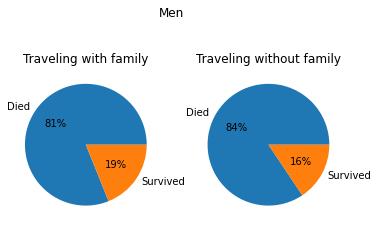

In [57]:
plt.suptitle("Men")
plt.subplot(1,2,1)
plt.pie(train_men.Survived[train_men['With_Family']=='Yes'].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Traveling with family")
plt.subplot(1,2,2)
plt.pie(train_men.Survived[train_men['With_Family']=='No'].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Traveling without family")
plt.show()

whether or not men traveled with family or not hardly made a difference, slightly in favor of those traveling with family. 19% of those traveling with family survived versus 16% without family survived

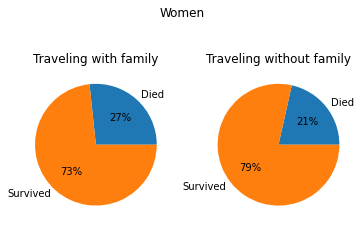

In [58]:
plt.suptitle("Women")
plt.subplot(1,2,1)
plt.pie(train_women.Survived[train_women['With_Family']=='Yes'].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Traveling with family")
plt.subplot(1,2,2)
plt.pie(train_women.Survived[train_women['With_Family']=='No'].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Traveling without family")
plt.show()

Likewise, whether or not women were traveling with family also only created a marginal difference but this time in favour of those who travelled individually, 73% of women traveling with family survived versus 78% of women traveling individually.

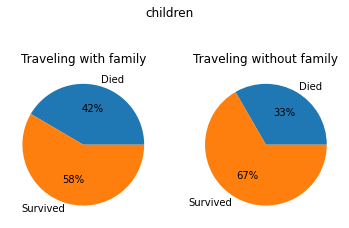

In [59]:
plt.suptitle("children")
plt.subplot(1,2,1)
plt.pie(train_children.Survived[train_children['With_Family']=='Yes'].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Traveling with family")
plt.subplot(1,2,2)
plt.pie(train_children.Survived[train_children['With_Family']=='No'].value_counts(sort=False),labels=labels, autopct='%1.0f%%')
plt.title("Traveling without family")
plt.show()

Also, children’s survivability rate compared with whether or not they were traveling with family was in favor of those who were on their own–surviving 67% versus 58% of those traveling with family

# Conclusion

We found that women and children survived at much higher rates than men, probably because they were let off of the ship first. Although the hypothesis that passenger class would have the strongest effect on survival overall, we found that the relationship didn’t hold when we broke down the population into men, women, and children. We found that embarkment point also had an impact on survival, since those embarking at Cherbourg survived at much higher rates than the other two embarkment points.